In [1]:
#Reading data and filter bad data
import pandas as pd
import numpy as np
data = pd.read_csv("result_contest.csv", index_col=0)
data = data.query('swimtime!="00:00:00.00"')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [2]:
#Clean data
data['date']=pd.to_datetime(data['date'])
data['athlete_birthdate']=pd.to_datetime(data['athlete_birthdate'])
data['swimtime']=pd.to_timedelta(data['swimtime'])
data['athlete_swrid'] = data['athlete_swrid'].fillna(-1).astype(np.int64)
data['points'] = data['points'].fillna(0).astype(np.int64)
data['year'] = data['date'].dt.year
data['athlete_year']=data['athlete_birthdate'].dt.year
#data['athlete_year'] = data['athlete_year'].astype(np.int64)
data['athlete_age']=data['year']-data['athlete_year']
#data['athlete_age'] = data['athlete_age'].astype(np.int64)
data['athlete_year'] = data['athlete_year'].fillna(-1). astype(np.int64)
data['athlete_age'] = data['athlete_age'].fillna(-1).astype(np.int64)                                             
data['city'] = data['city'].apply(lambda city:city.capitalize())
data['swimtime_only_ms']=data['swimtime'].apply(lambda time :(time.microseconds/1000)).astype(np.int64)
data['swimtime_total_ms']=data['swimtime'].apply(lambda time :time.total_seconds()).astype(np.int64)
data['swimtime_ms']=data['swimtime_only_ms']+data['swimtime_total_ms']*1000

In [3]:
#Show our data
data.head(10)

,id_ranking,uuid,distance,stroke,technique,eventid,agemin,agemax,order,place,...,url,city,name,date,year,athlete_year,athlete_age,swimtime_only_ms,swimtime_total_ms,swimtime_ms
0,5e2875cc6eff87f1a4978590,2f69d8db-8378-402f-99d2-8cb4e1b8c0c3,50,BACK,NORMAL,1148,-1,10,1,1,...,http://megatiming.pl/contest/2f69d8db-8378-402...,Elbląg,IV Elbląska Jesień Pływacka,2019-12-31,2019,2009,10,850,43,43850
1,5e2875cc6eff87f1a4978591,2f69d8db-8378-402f-99d2-8cb4e1b8c0c3,50,BACK,NORMAL,1148,-1,10,2,2,...,http://megatiming.pl/contest/2f69d8db-8378-402...,Elbląg,IV Elbląska Jesień Pływacka,2019-12-31,2019,2009,10,60,44,44060
2,5e2875cc6eff87f1a4978592,2f69d8db-8378-402f-99d2-8cb4e1b8c0c3,50,BACK,NORMAL,1148,-1,10,3,3,...,http://megatiming.pl/contest/2f69d8db-8378-402...,Elbląg,IV Elbląska Jesień Pływacka,2019-12-31,2019,2009,10,550,45,45550
3,5e2875cc6eff87f1a4978593,2f69d8db-8378-402f-99d2-8cb4e1b8c0c3,50,BACK,NORMAL,1148,-1,10,4,4,...,http://megatiming.pl/contest/2f69d8db-8378-402...,Elbląg,IV Elbląska Jesień Pływacka,2019-12-31,2019,2009,10,580,48,48580
4,5e2875cc6eff87f1a4978594,2f69d8db-8378-402f-99d2-8cb4e1b8c0c3,50,BACK,NORMAL,1148,-1,10,5,5,...,http://megatiming.pl/contest/2f69d8db-8378-402...,Elbląg,IV Elbląska Jesień Pływacka,2019-12-31,2019,2009,10,980,48,48980
5,5e2875cc6eff87f1a4978595,2f69d8db-8378-402f-99d2-8cb4e1b8c0c3,50,BACK,NORMAL,1148,-1,10,6,6,...,http://megatiming.pl/contest/2f69d8db-8378-402...,Elbląg,IV Elbląska Jesień Pływacka,2019-12-31,2019,2010,9,970,49,49970
6,5e2875cc6eff87f1a4978596,2f69d8db-8378-402f-99d2-8cb4e1b8c0c3,50,BACK,NORMAL,1148,-1,10,7,7,...,http://megatiming.pl/contest/2f69d8db-8378-402...,Elbląg,IV Elbląska Jesień Pływacka,2019-12-31,2019,2009,10,130,51,51130
7,5e2875cc6eff87f1a4978597,2f69d8db-8378-402f-99d2-8cb4e1b8c0c3,50,BACK,NORMAL,1148,-1,10,8,8,...,http://megatiming.pl/contest/2f69d8db-8378-402...,Elbląg,IV Elbląska Jesień Pływacka,2019-12-31,2019,2009,10,750,51,51750
8,5e2875cc6eff87f1a4978598,2f69d8db-8378-402f-99d2-8cb4e1b8c0c3,50,BACK,NORMAL,1148,-1,10,9,9,...,http://megatiming.pl/contest/2f69d8db-8378-402...,Elbląg,IV Elbląska Jesień Pływacka,2019-12-31,2019,2010,9,910,55,55910
9,5e2875cc6eff87f1a4978599,2f69d8db-8378-402f-99d2-8cb4e1b8c0c3,50,BACK,NORMAL,1148,-1,10,10,10,...,http://megatiming.pl/contest/2f69d8db-8378-402...,Elbląg,IV Elbląska Jesień Pływacka,2019-12-31,2019,2010,9,600,56,56600


In [4]:
#Filter data
mydata = data.query('athlete_age==8 and distance==25 and stroke =="FREE" and technique=="NORMAL" and athlete_gender=="M"').sort_values(by='swimtime')[["uuid","name","city" ,"date","athlete_firstname","athlete_lastname","athlete_swrid" ,"swimtime","athlete_age","swimtime_ms"]]

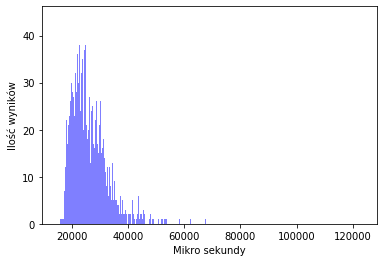

In [5]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
#%matplotlib inline
num_bins=1000

n, bins, patches = plt.hist(mydata['swimtime_ms'], num_bins,  facecolor='blue', alpha=0.5 )
plt.xlabel('Mikro sekundy')
plt.ylabel('Ilość wyników')
plt.savefig('test.svg', format='svg', dpi=900)
plt.show()

In [15]:
athlete_data = data.query('distance==25 and stroke =="FREE" and technique=="NORMAL" and athlete_firstname=="Filip" and athlete_lastname=="Mrozek"').sort_values(by='date')[["uuid","name","city" ,"date","athlete_firstname","athlete_lastname","athlete_swrid" ,"swimtime","athlete_age","swimtime_ms"]]

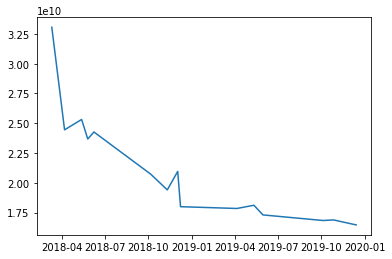

In [17]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
#%matplotlib inline


plt.plot(athlete_data['date'],athlete_data['swimtime'])


